In [77]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

In [2]:
meco = pd.read_excel(r"C:\Users\ayush\Desktop\GL DSE\project kaggle sales\macro_economic.xlsx",parse_dates=['Year-Month'])

In [3]:
meco.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009-04-01,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009-05-01,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [4]:
meco.columns

Index(['Year-Month', 'Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'PartyInPower',
       'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'AdvertisingExpenses (in Thousand Dollars)',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports'],
      dtype='object')

In [5]:

df = pd.read_csv(r"C:\Users\ayush\Desktop\GL DSE\project kaggle sales\train.csv")

In [6]:
df_test = pd.read_csv(r"C:\Users\ayush\Desktop\GL DSE\project kaggle sales\test.csv")

In [7]:
df_test.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2015,1,WomenClothing,NaN
1,2015,1,MenClothing,NaN
2,2015,1,OtherClothing,NaN
3,2015,2,WomenClothing,NaN
4,2015,2,MenClothing,NaN


In [8]:
df = pd.concat([df,df_test],axis=0)

In [9]:
df.shape

(252, 4)

In [10]:
df.Month = df.Month.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 35
Data columns (total 4 columns):
Year                         252 non-null int64
Month                        252 non-null object
ProductCategory              252 non-null object
Sales(In ThousandDollars)    204 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.8+ KB


In [12]:
df['date'] = df['Year'].astype('str') + '-' + df['Month']

In [13]:
df.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars),date
0,2009,Jan,WomenClothing,1755.0,2009-Jan
1,2009,Jan,MenClothing,524.0,2009-Jan
2,2009,Jan,OtherClothing,936.0,2009-Jan
3,2009,Feb,WomenClothing,1729.0,2009-Feb
4,2009,Feb,MenClothing,496.0,2009-Feb


In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars),date
0,2009,Jan,WomenClothing,1755.0,2009-01-01
1,2009,Jan,MenClothing,524.0,2009-01-01
2,2009,Jan,OtherClothing,936.0,2009-01-01
3,2009,Feb,WomenClothing,1729.0,2009-02-01
4,2009,Feb,MenClothing,496.0,2009-02-01


In [16]:
df1 = df.drop(['Year'],axis =1)

In [17]:
df1.head()

,Month,ProductCategory,Sales(In ThousandDollars),date
0,Jan,WomenClothing,1755.0,2009-01-01
1,Jan,MenClothing,524.0,2009-01-01
2,Jan,OtherClothing,936.0,2009-01-01
3,Feb,WomenClothing,1729.0,2009-02-01
4,Feb,MenClothing,496.0,2009-02-01


In [18]:
df1.columns = ['Month','ProductCategory', 'Sales(In ThousandDollars)', 'Year-Month']

In [19]:
df1.shape

(252, 4)

In [20]:
final = pd.merge(df1,meco,on=['Year-Month'])

In [21]:
final.shape how to drag 

(252, 21)

In [22]:
final.head()

,Month,ProductCategory,Sales(In ThousandDollars),Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,...,Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,Jan,WomenClothing,1755.0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
1,Jan,MenClothing,524.0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
2,Jan,OtherClothing,936.0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
3,Feb,WomenClothing,1729.0,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,...,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10
4,Feb,MenClothing,496.0,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,...,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10


In [23]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 21 columns):
Month                                                                252 non-null object
ProductCategory                                                      252 non-null object
Sales(In ThousandDollars)                                            204 non-null float64
Year-Month                                                           252 non-null datetime64[ns]
Monthly Nominal GDP Index (inMillion$)                               252 non-null float64
Monthly Real GDP Index (inMillion$)                                  252 non-null float64
CPI                                                                  252 non-null float64
PartyInPower                                                         252 non-null object
unemployment rate                                                    252 non-null float64
CommercialBankInterestRateonCreditCardPlans                          252 non-null

In [24]:
final_tr =final.iloc[:216,:]

In [25]:
final_tes = final.iloc[216:,:]

In [26]:
final_tr.head()

,Month,ProductCategory,Sales(In ThousandDollars),Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,...,Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,Jan,WomenClothing,1755.0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
1,Jan,MenClothing,524.0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
2,Jan,OtherClothing,936.0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
3,Feb,WomenClothing,1729.0,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,...,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10
4,Feb,MenClothing,496.0,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,...,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10


In [27]:
final_tr.isna().any()

Month                                                                False
ProductCategory                                                      False
Sales(In ThousandDollars)                                             True
Year-Month                                                           False
Monthly Nominal GDP Index (inMillion$)                               False
Monthly Real GDP Index (inMillion$)                                  False
CPI                                                                  False
PartyInPower                                                         False
unemployment rate                                                    False
CommercialBankInterestRateonCreditCardPlans                          False
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    False
Earnings or wages  in dollars per hour                               False
AdvertisingExpenses (in Thousand Dollars)                            False
Cotton Monthly Price - US

In [28]:
final_tes.head()

,Month,ProductCategory,Sales(In ThousandDollars),Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,...,Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
216,Jan,WomenClothing,NaN,2015-01-01,17792.116953,16319.786314,258.376,Democrats,5.7,11.99,...,24.88,?,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45
217,Jan,MenClothing,NaN,2015-01-01,17792.116953,16319.786314,258.376,Democrats,5.7,11.99,...,24.88,?,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45
218,Jan,OtherClothing,NaN,2015-01-01,17792.116953,16319.786314,258.376,Democrats,5.7,11.99,...,24.88,?,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45
219,Feb,WomenClothing,NaN,2015-02-01,17931.046190,16400.926737,259.240,Democrats,5.5,11.98,...,25.05,?,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20
220,Feb,MenClothing,NaN,2015-02-01,17931.046190,16400.926737,259.240,Democrats,5.5,11.98,...,25.05,?,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20


In [29]:
final_tr_null = final_tr[final_tr['Sales(In ThousandDollars)'].isnull()]

In [30]:
final_tr[final_tr['Sales(In ThousandDollars)'].isnull()]

,Month,ProductCategory,Sales(In ThousandDollars),Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,...,Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
45,Apr,WomenClothing,NaN,2010-04-01,14844.531193,14724.200153,240.529,Democrats,9.9,14.26,...,22.53,116,88.09,2.68,9.008,7.552,747,11.751,3.470,11.365
47,Apr,OtherClothing,NaN,2010-04-01,14844.531193,14724.200153,240.529,Democrats,9.9,14.26,...,22.53,116,88.09,2.68,9.008,7.552,747,11.751,3.470,11.365
58,Aug,MenClothing,NaN,2010-08-01,15036.277627,14824.165770,241.569,Democrats,9.5,13.59,...,22.55,?,90.35,7.37,10.700,10.424,831,18.036,3.370,14.525
88,Jun,MenClothing,NaN,2011-06-01,15422.381847,14927.332731,248.505,Democrats,9.1,12.89,...,22.81,221,160.65,-2.94,12.313,9.950,787,16.323,3.770,12.400
89,Jun,OtherClothing,NaN,2011-06-01,15422.381847,14927.332731,248.505,Democrats,9.1,12.89,...,22.81,221,160.65,-2.94,12.313,9.950,787,16.323,3.770,12.400
99,Oct,WomenClothing,NaN,2011-10-01,15840.385406,15249.763484,250.051,Democrats,8.8,12.28,...,23.30,?,110.61,-5.18,14.431,9.562,797,15.871,3.775,10.825
113,Feb,OtherClothing,NaN,2012-02-01,16073.575390,15385.847018,250.285,Democrats,8.3,12.34,...,23.40,?,100.75,-0.36,14.426,9.444,754,14.828,3.475,10.350
130,Aug,MenClothing,NaN,2012-08-01,16161.118172,15317.424193,253.472,Democrats,8.1,11.95,...,23.26,201,84.40,0.51,12.400,10.577,771,16.988,3.375,11.375
132,Sep,WomenClothing,NaN,2012-09-01,16283.278725,15391.877310,254.554,Democrats,7.8,11.95,...,23.67,?,84.15,-0.30,12.121,10.206,774,16.452,3.375,11.075
173,Oct,OtherClothing,NaN,2013-10-01,16884.854816,15729.959366,257.069,Democrats,7.2,11.88,...,24.04,?,89.35,-0.82,10.136,7.582,777,12.273,3.480,9.650


In [31]:
tr_ntnull =  final_tr[~final_tr["Sales(In ThousandDollars)"].isnull()]

In [32]:
## imputing null values in sales by means for different categories

In [33]:
final_tr['Sales(In ThousandDollars)'] = final_tr.groupby('ProductCategory').transform(lambda x: x.fillna(x.mean()))

C:\Users\ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
final_tr

,Month,ProductCategory,Sales(In ThousandDollars),Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,...,Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,Jan,WomenClothing,1755.000000,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550
1,Jan,MenClothing,524.000000,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550
2,Jan,OtherClothing,936.000000,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.170,11.550
3,Feb,WomenClothing,1729.000000,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,...,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100
4,Feb,MenClothing,496.000000,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,...,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100
5,Feb,OtherClothing,859.000000,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,...,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.870,11.100
6,Mar,WomenClothing,2256.000000,2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,...,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650
7,Mar,MenClothing,542.000000,2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,...,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650
8,Mar,OtherClothing,921.000000,2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,...,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.720,11.650
9,Apr,WomenClothing,2662.000000,2009-04-01,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,...,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.620,12.225


In [35]:
final_tr.shape

(216, 21)

In [36]:
final_tes.shape

(36, 21)

In [37]:
total = pd.concat([final_tr,final_tes],axis=0)

In [38]:
total.head()

,Month,ProductCategory,Sales(In ThousandDollars),Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,...,Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,Jan,WomenClothing,1755.0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
1,Jan,MenClothing,524.0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
2,Jan,OtherClothing,936.0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,...,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55
3,Feb,WomenClothing,1729.0,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,...,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10
4,Feb,MenClothing,496.0,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,...,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10


In [39]:
total.shape

(252, 21)

In [40]:
total.PartyInPower.value_counts()

Democrats    252
Name: PartyInPower, dtype: int64

In [41]:
total.columns

Index(['Month', 'ProductCategory', 'Sales(In ThousandDollars)', 'Year-Month',
       'Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'PartyInPower',
       'unemployment rate', 'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'AdvertisingExpenses (in Thousand Dollars)',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports'],
      dtype='object')

In [42]:
total = total.drop(['ProductCategory','AdvertisingExpenses (in Thousand Dollars)','Year-Month','Month','PartyInPower'],axis=1)

In [43]:
total_train = total.iloc[:216,:]

In [115]:
total_test.head()

,Sales(In ThousandDollars),Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
216,NaN,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45
217,NaN,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45
218,NaN,17792.116953,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45
219,NaN,17931.046190,16400.926737,259.240,5.5,11.98,9.85,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20
220,NaN,17931.046190,16400.926737,259.240,5.5,11.98,9.85,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20


In [44]:
total_test = total.iloc[216:,:]

In [45]:
X = total.drop(['Sales(In ThousandDollars)'],axis=1)

In [116]:
X.shape

(252, 15)

In [46]:
Y = total['Sales(In ThousandDollars)']

In [47]:
total.shape

(252, 16)

In [122]:
X.columns

Index(['Monthly Nominal GDP Index (inMillion$)',
       'Monthly Real GDP Index (inMillion$)', 'CPI', 'unemployment rate',
       'CommercialBankInterestRateonCreditCardPlans',
       'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
       'Earnings or wages  in dollars per hour',
       'Cotton Monthly Price - US cents per Pound(lbs)', 'Change(in%)',
       'Average upland planted(million acres)',
       'Average upland harvested(million acres)', 'yieldperharvested acre',
       'Production (in  480-lb netweright in million bales)',
       'Mill use  (in  480-lb netweright in million bales)', 'Exports'],
      dtype='object')

### Scaling data

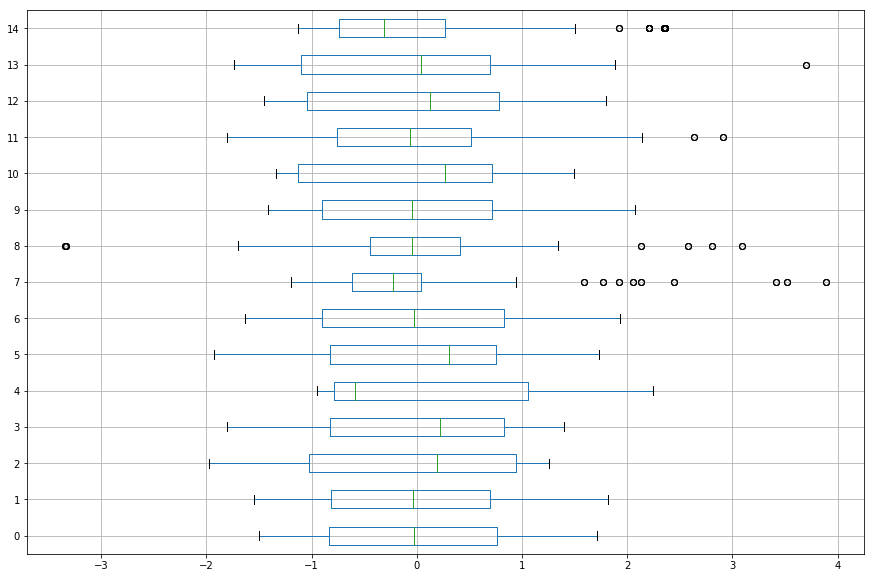

In [118]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
total_scaled=pd.DataFrame(scaler.transform(X))
total_scaled.boxplot(vert=False,figsize=(15,10))

###  Applying PCA

In [119]:
from sklearn.decomposition import PCA
# PCA using 15 features
pca15 = PCA(n_components=15)
features_pca15 = pca15.fit_transform(X)
features_pca15

array([[-2.01479996e+03,  2.78088973e+01, -4.18990413e+01, ...,
         1.51973497e-01,  1.13709259e-01, -3.36229565e-02],
       [-2.01479996e+03,  2.78088973e+01, -4.18990413e+01, ...,
         1.51973497e-01,  1.13709259e-01, -3.36229565e-02],
       [-2.01479996e+03,  2.78088973e+01, -4.18990413e+01, ...,
         1.51973497e-01,  1.13709259e-01, -3.36229565e-02],
       ...,
       [ 2.44422585e+03, -4.62644364e+01, -2.34853586e+01, ...,
        -7.49578111e-02, -5.84524846e-02,  2.74819802e-02],
       [ 2.44422585e+03, -4.62644364e+01, -2.34853586e+01, ...,
        -7.49578111e-02, -5.84524846e-02,  2.74819802e-02],
       [ 2.44422585e+03, -4.62644364e+01, -2.34853586e+01, ...,
        -7.49578111e-02, -5.84524846e-02,  2.74819802e-02]])

In [120]:
vr =pca15.explained_variance_ratio_
vr

array([9.98150255e-01, 9.25115053e-04, 6.12576589e-04, 2.84105874e-04,
       2.33738762e-05, 2.62200904e-06, 1.28606531e-06, 3.73055553e-07,
       2.02375603e-07, 3.68466261e-08, 2.37233042e-08, 1.16075071e-08,
       9.68614670e-09, 4.67194151e-09, 3.08546729e-09])

In [121]:
np.cumsum(pca15.explained_variance_ratio_)

array([0.99815026, 0.99907537, 0.99968795, 0.99997205, 0.99999543,
       0.99999805, 0.99999933, 0.99999971, 0.99999991, 0.99999995,
       0.99999997, 0.99999998, 0.99999999, 1.        , 1.        ])

In [123]:
import seaborn as sns

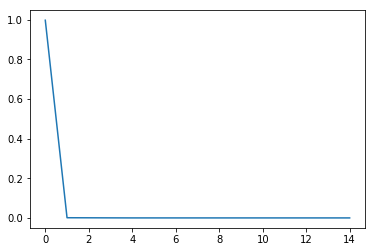

In [124]:
sns.lineplot(x=np.arange(15), y=vr)

In [125]:
total_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.414961,-1.451750,-1.976245,-0.008402,-0.676839,1.736041,-1.540045,-1.020131,0.481032,-0.89874,-1.15215,0.203787,-1.040479,3.702312,0.210192
1,-1.414961,-1.451750,-1.976245,-0.008402,-0.676839,1.736041,-1.540045,-1.020131,0.481032,-0.89874,-1.15215,0.203787,-1.040479,3.702312,0.210192
2,-1.414961,-1.451750,-1.976245,-0.008402,-0.676839,1.736041,-1.540045,-1.020131,0.481032,-0.89874,-1.15215,0.203787,-1.040479,3.702312,0.210192
3,-1.441081,-1.512607,-1.833026,0.312399,0.555423,0.972752,-1.362934,-1.091208,-0.674474,-0.89874,-1.15215,0.203787,-1.040479,1.879867,-0.048738
4,-1.441081,-1.512607,-1.833026,0.312399,0.555423,0.972752,-1.362934,-1.091208,-0.674474,-0.89874,-1.15215,0.203787,-1.040479,1.879867,-0.048738


In [129]:
total_scaled.shape

(252, 15)

### Preparing data for k-fold CV

In [182]:
x_train = total_scaled.iloc[:216,:2]

In [183]:
x_test = total_scaled.iloc[216:,:2]

In [184]:
x_test.head()

,0,1
216,1.289419,1.395897
217,1.289419,1.395897
218,1.289419,1.395897
219,1.400895,1.516697
220,1.400895,1.516697


In [185]:
y_train = Y[:216]

In [186]:
y_train.head()

0    1755.0
1     524.0
2     936.0
3    1729.0
4     496.0
Name: Sales(In ThousandDollars), dtype: float64

In [187]:
y_test = Y[216:]

In [188]:
y_test.tail()

247   NaN
248   NaN
249   NaN
250   NaN
251   NaN
Name: Sales(In ThousandDollars), dtype: float64

In [189]:
lig_reg = LinearRegression()

In [190]:
lig_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [191]:
np.array(y_train)

array([1755.        ,  524.        ,  936.        , 1729.        ,
        496.        ,  859.        , 2256.        ,  542.        ,
        921.        , 2662.        ,  669.        ,  914.        ,
       2732.        ,  650.        ,  989.        , 2220.        ,
        607.        ,  932.        , 2164.        ,  575.        ,
        901.        , 2371.        ,  551.        ,  865.        ,
       2421.        ,  579.        ,  819.        , 2579.        ,
        610.        ,  914.        , 2521.        ,  620.        ,
        955.        , 3390.        ,  930.        , 1351.        ,
       2142.        ,  476.        ,  945.        , 2413.        ,
        471.        ,  869.        , 3102.        ,  568.        ,
        941.        , 3293.47826087,  630.        , 1107.62686567,
       3221.        ,  627.        ,  991.        , 2756.        ,
        598.        ,  984.        , 2749.        ,  544.        ,
        937.        , 2807.        ,  673.80882353,  897.     

In [192]:
y_predict= lig_reg.predict(x_train)

In [193]:
rmse = np.sqrt(mean_squared_error(y_train,y_predict))

In [194]:
rmse

1212.7734162527233

In [195]:
y_train.tail()

211     803.0
212    1468.0
213    5664.0
214    1070.0
215    1967.0
Name: Sales(In ThousandDollars), dtype: float64

In [196]:
x_train.head()

,0,1
0,-1.414961,-1.451750
1,-1.414961,-1.451750
2,-1.414961,-1.451750
3,-1.441081,-1.512607
4,-1.441081,-1.512607


### Ada boosting

In [200]:
from sklearn.ensemble import AdaBoostRegressor

In [224]:
base_LR=LinearRegression()
abcl_LR = AdaBoostRegressor(base_estimator=base_LR,n_estimators=5,random_state=3)

In [225]:
abcl_LR.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
         learning_rate=1.0, loss='linear', n_estimators=5, random_state=3)

In [226]:
ada_pre = abcl_LR.predict(x_train)

In [227]:
rmse_ada = np.sqrt(mean_squared_error(y_train,ada_pre))

In [228]:
rmse_ada

1218.8346260684445

### K- fold CV

In [197]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

In [198]:
kf=KFold(n_splits=4,shuffle=True,random_state=3)
rmse=[]
for train,test in kf.split(x_train,y_train):
    M=LinearRegression()
    Xtrain,Xtest=x_train.iloc[train,:],x_train.iloc[test,:]
    Ytrain,Ytest=y_train.iloc[train],y_train.iloc[test]
    M.fit(Xtrain,Ytrain)
    Y_predict=M.predict(Xtest)
    rmse.append(np.sqrt(mean_squared_error(Ytest,Y_predict)))
print("Cross-validated rmse:%.2f%% " % np.mean(rmse))
print(rmse)

Cross-validated rmse:1232.36% 
[1270.500341629106, 1263.7519126541188, 1181.3655204305358, 1213.836380516054]


In [199]:
rmse

[1270.500341629106, 1263.7519126541188, 1181.3655204305358, 1213.836380516054]

### testing for test data

In [179]:
y_test_predict= lig_reg.predict(x_test)

In [181]:
y_test_predict

array([2373.9342058 , 2373.9342058 , 2373.9342058 , 2419.77544006,
       2419.77544006, 2419.77544006, 2355.55132678, 2355.55132678,
       2355.55132678, 2425.45725972, 2425.45725972, 2425.45725972,
       2409.40017895, 2409.40017895, 2409.40017895, 2468.17846297,
       2468.17846297, 2468.17846297, 2438.15068687, 2438.15068687,
       2438.15068687, 2458.24286244, 2458.24286244, 2458.24286244,
       2522.54989492, 2522.54989492, 2522.54989492, 2481.6492012 ,
       2481.6492012 , 2481.6492012 , 2477.91805375, 2477.91805375,
       2477.91805375, 2539.71977765, 2539.71977765, 2539.71977765])